In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from DataPreprocessing import * 

In [3]:
from LogisticRegression import log_reg_y_pred  as lr
from KNN import knn_pred as knn
from NaiveBayes import nb_predictions as nb
from SVM import svm_poly_pred as svm
from DecisionTree import gini_d_tree_y_pred as dt
from RandomForest import gini_rd_frst_y_pred as rdf

In [4]:
from sklearn.metrics import *

In [5]:
cm_log = confusion_matrix(y_test,lr)
cm_knn = confusion_matrix(y_test,knn)
cm_nb = confusion_matrix(y_test,nb)
cm_svm = confusion_matrix(y_test,svm)
cm_dt = confusion_matrix(y_test,dt)
cm_rf = confusion_matrix(y_test,rdf)

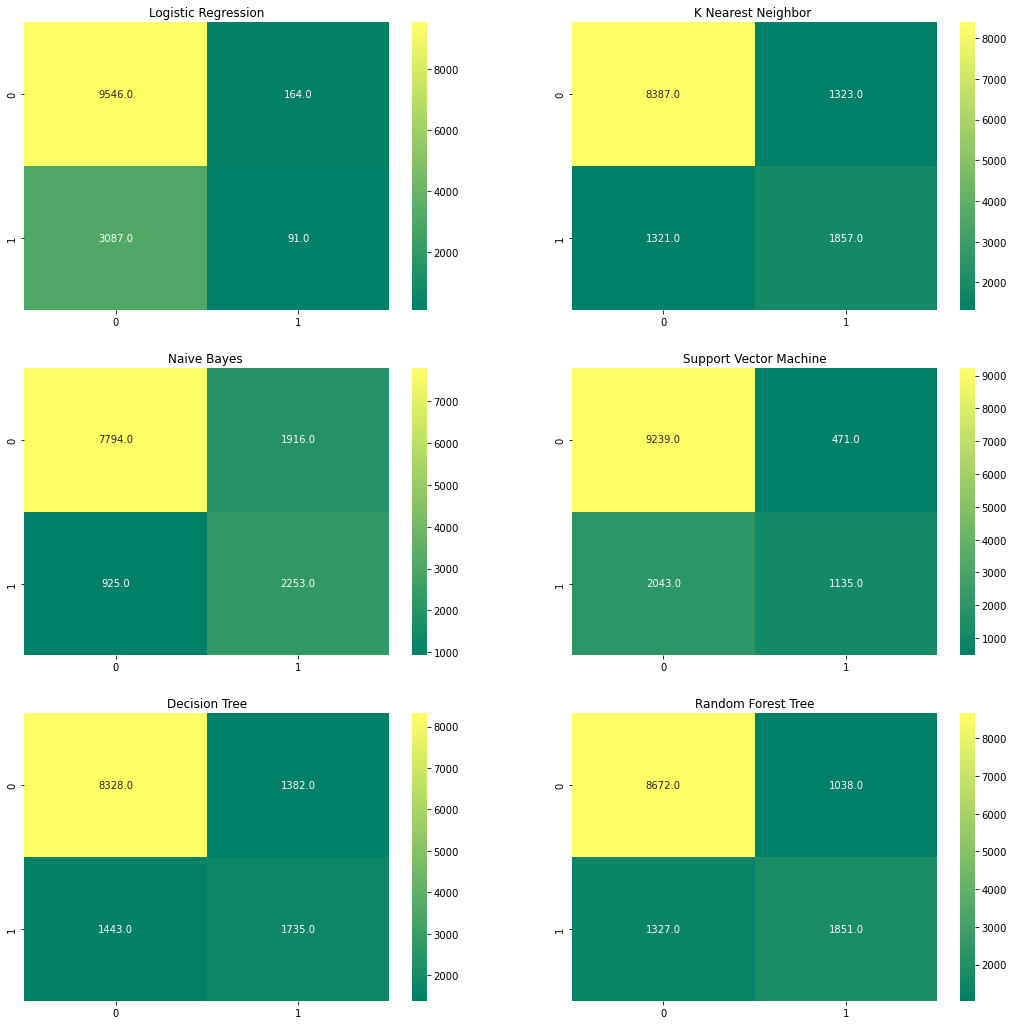

In [6]:
fig=plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.heatmap(cm_log,annot=True, fmt=".1f", cmap='summer')
plt.title('Logistic Regression')

plt.subplot(3,2,2)
sns.heatmap(cm_knn,annot=True, fmt=".1f", cmap='summer')
plt.title('K Nearest Neighbor ')

plt.subplot(3,2,3)
sns.heatmap(cm_nb,annot=True, fmt=".1f", cmap='summer')
plt.title('Naive Bayes ')

plt.subplot(3,2,4)
sns.heatmap(cm_svm,annot=True, fmt=".1f", cmap='summer')
plt.title('Support Vector Machine')

plt.subplot(3,2,5)
sns.heatmap(cm_dt,annot=True, fmt=".1f", cmap='summer' )
plt.title('Decision Tree')

plt.subplot(3,2,6)
sns.heatmap(cm_rf,annot=True, fmt=".1f", cmap='summer')
plt.title('Random Forest Tree')
plt.show()

In [7]:
cr_log = classification_report(y_test,lr)
cr_knn = classification_report(y_test,knn)
cr_nb = classification_report(y_test,nb)
cr_svm = classification_report(y_test,svm)
cr_dt = classification_report(y_test,dt)
cr_rf = classification_report(y_test,rdf)

In [8]:
print("*"*20+'Logistic Regression'+"*"*20)
print(cr_log)

print("*"*20+'K Nearest Neighbor'+"*"*20)
print(cr_knn)

print("*"*20+'Naive Bayes'+"*"*20)
print(cr_nb)

print("*"*20+'Support Vector Machine'+"*"*20)
print(cr_svm)

print("*"*20+'Decision tree'+"*"*20)
print(cr_dt)

print("*"*20+'Random Forest'+"*"*20)
print(cr_rf)

********************Logistic Regression********************
              precision    recall  f1-score   support

           0       0.76      0.98      0.85      9710
           1       0.36      0.03      0.05      3178

    accuracy                           0.75     12888
   macro avg       0.56      0.51      0.45     12888
weighted avg       0.66      0.75      0.66     12888

********************K Nearest Neighbor********************
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9710
           1       0.58      0.58      0.58      3178

    accuracy                           0.79     12888
   macro avg       0.72      0.72      0.72     12888
weighted avg       0.79      0.79      0.79     12888

********************Naive Bayes********************
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      9710
           1       0.54      0.71      0.61      3178

    accurac

In [9]:
def cr_break(report):
    report_data = []
    lines = report.split('\n')
    a=lines[6]
    stats = a.split('     ')
    precision = float(stats[1].strip())
    precisions.append(precision)
    recall = float(stats[2].strip())
    recalls.append(recall)
    f1_score = float(stats[3].strip())
    f1_scores.append(f1_score)
    support = float(stats[4].strip())
    supports.append(support)


In [10]:
reports = [cr_log, cr_knn, cr_nb, cr_svm, cr_dt, cr_rf]
precisions = []
recalls = []
f1_scores = []
supports = []
for i in reports:
    cr_break(i)

In [11]:
ac_log = accuracy_score(y_test,lr)
ac_knn = accuracy_score(y_test,knn)
ac_nb = accuracy_score(y_test,nb)
ac_svm = accuracy_score(y_test,svm)
ac_dt = accuracy_score(y_test,dt)
ac_rf = accuracy_score(y_test,rdf)

In [12]:
scores = [ac_log, ac_knn, ac_nb, ac_svm, ac_dt, ac_rf]

In [13]:
algorithms = ['Logistic Regression' ,
              'K-Nearest Neighbors',
              'Naive Bayes',
              'Support Vector Machine',
             'Decision Tree',
             'Random Forest Classifier']

In [14]:
sc_max_y_lim = max(scores) + 0.05
sc_min_y_lim = min(scores) - 0.05

pr_max_y_lim = max(precisions) + 0.05
pr_min_y_lim = min(precisions) - 0.05

re_max_y_lim = max(recalls) + 0.05
re_min_y_lim = min(recalls) - 0.05

f1_max_y_lim = max(f1_scores) + 0.05
f1_min_y_lim = min(f1_scores) - 0.05


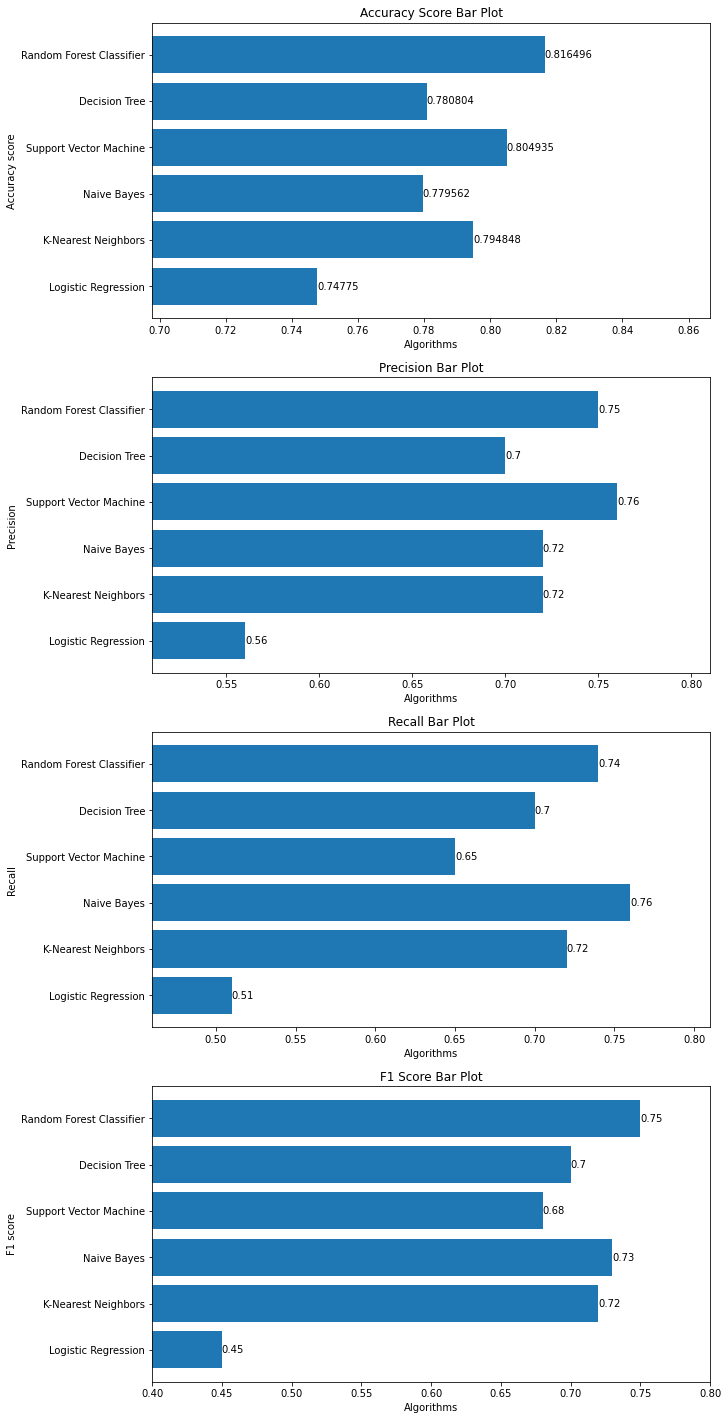

In [15]:
fig=plt.figure(figsize=(10,25))

plt.subplot(4,1,1)
plt.xlim(sc_min_y_lim, sc_max_y_lim)
bars =plt.barh(algorithms, scores)
plt.bar_label(bars)
plt.xlabel("Algorithms")
plt.ylabel('Accuracy score')
plt.title('Accuracy Score Bar Plot')

plt.subplot(4,1,2)
plt.xlim(pr_min_y_lim, pr_max_y_lim)
bars =plt.barh(algorithms, precisions)
plt.bar_label(bars)
plt.xlabel("Algorithms")
plt.ylabel('Precision')
plt.title('Precision Bar Plot')

plt.subplot(4,1,3)
plt.xlim(re_min_y_lim, re_max_y_lim)
bars =plt.barh(algorithms, recalls)
plt.bar_label(bars)
plt.xlabel("Algorithms")
plt.ylabel('Recall')
plt.title('Recall Bar Plot')

plt.subplot(4,1,4)
plt.xlim(f1_min_y_lim, f1_max_y_lim)
bars =plt.barh(algorithms, f1_scores)
plt.bar_label(bars)
plt.xlabel("Algorithms")
plt.ylabel('F1 score')
plt.title('F1 Score Bar Plot')

plt.show()